A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.

# Problem Statement:
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
cust_data = pd.read_excel(r"C:\Users\vamsh\Downloads\python\ML Projects\K-Means\cust_data.xlsx")
cust_data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [6]:
data = cust_data.loc[:,'Orders':'Kraft']
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
samples = data.values
samples

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

# Creating the Elbow Chart

In [14]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

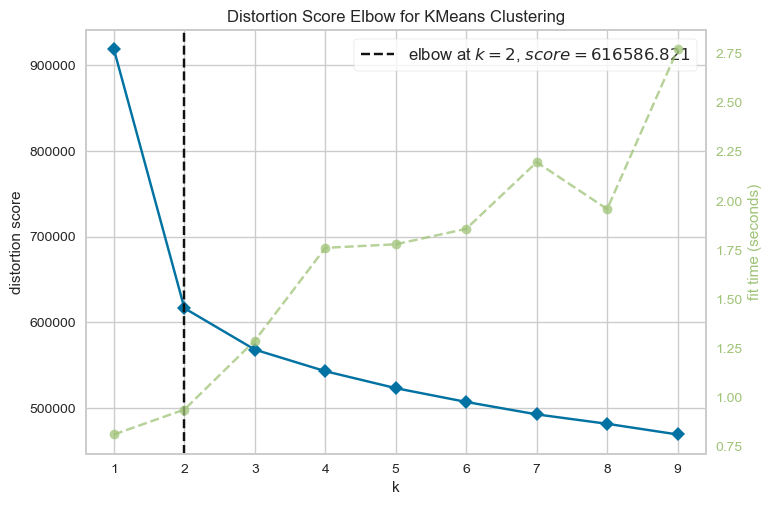

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer as kev
km = KMeans(random_state = 50)
visualizer = kev(km,k=(1,10), timimgs = False)
visualizer.fit(samples)
visualizer.show()

# k = no.of groups = 2( from the elbow chart)

# Building KMeans Model

In [16]:
?KMeans

In [17]:
model = KMeans(n_clusters = 2,max_iter=300,random_state=50)

In [18]:
cust_data['group'] = model.fit_predict(samples)
cust_data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,group
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [19]:
cust_data['group'] = cust_data.group.replace([0,1],['Group-1','Group-2'])
cust_data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,group
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Group-1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Group-2
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Group-1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Group-2
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,Group-1


In [21]:
cust_data.group.value_counts()

group
Group-2    16823
Group-1    13177
Name: count, dtype: int64

# cluster centroids

In [22]:
model.cluster_centers_

array([[7.75358579, 0.28003339, 0.27456933, 0.23791455, 0.17378766,
        0.14927525, 0.14457008, 0.10859832, 0.11633908, 0.08962586,
        0.14487364, 0.35470896, 0.20285346, 0.1488958 , 0.16642635,
        0.10374137, 0.32184868, 0.05122562, 0.79137892, 0.25514153,
        0.47415952, 0.26553844, 0.12301738, 0.02914169, 0.44243758,
        0.12514229, 0.09675951, 0.27737725, 0.38559611, 0.16096228,
        0.07763527, 0.05570312, 0.19473325, 0.12256204, 0.09068832,
        0.06746604],
       [1.36271771, 0.25756405, 0.23491648, 0.21119895, 0.1515782 ,
        0.13903584, 0.13600428, 0.1056292 , 0.1075908 , 0.09790168,
        0.13642038, 0.30743625, 0.21440885, 0.13564763, 0.15692802,
        0.10794745, 0.28330262, 0.04559234, 0.72614872, 0.2422279 ,
        0.46822802, 0.25209535, 0.1154372 , 0.0341794 , 0.41675088,
        0.11834988, 0.10705582, 0.26624264, 0.35790287, 0.15740355,
        0.07769126, 0.05861024, 0.19021578, 0.111514  , 0.08595375,
        0.07358973]])

# Business Submission

In [24]:
submission = cust_data.loc[:,['Cust_ID','group']]
submission.head()

,Cust_ID,group
0,1,Group-1
1,2,Group-2
2,3,Group-1
3,4,Group-2
4,5,Group-1


In [25]:
submission.to_excel('E-commerce Customer Segmentation.xlsx', index = False, sheet_name ='output')

# Finished